# t-sne 觀察 : 流形還原

# [作業目標]
- 試著模仿範例寫法, 觀察 S 形使用 t-SNE , 在不同困惑度 (perplexity) 下的流形還原效果

# [作業重點]
- 使用 S 形資料集, 觀察 t-sne 在困惑度 (perplexity) 有所不同時, 流形還原的效果如何變化 (In[4], Out[4])
- Hint : ax.scatter(Y[red, 0], Y[red, 1], c="r") 與 ax.scatter(Y[green, 0], Y[green, 1], c="g") 兩行改一行 ax.scatter(Y[:, 0], Y[:, 1], c=color)

In [2]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

In [7]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2
perplexities = [4, 6, 9, 14, 21, 30, 45, 66, 100]

# 設定S曲線資料點
X, color = datasets.samples_generator.make_s_curve(n_samples, random_state=0)

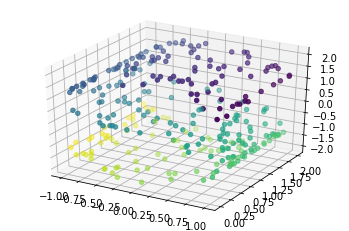

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0],X[:,1],X[:,2], c=color, marker='o')


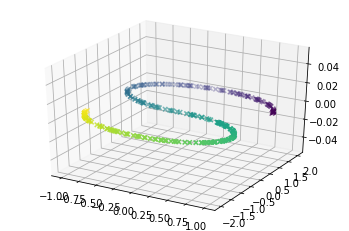

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,2], c=color, marker='x')

# 作業
* 將原始資料集換為S型圖, 觀察不同 perplexity 下的流形還原結果

circles, perplexity=4 in 1.7 sec
circles, perplexity=6 in 1.9 sec
circles, perplexity=9 in 1.9 sec
circles, perplexity=14 in 1.8 sec
circles, perplexity=21 in 2.2 sec
circles, perplexity=30 in 2.1 sec
circles, perplexity=45 in 2.5 sec
circles, perplexity=66 in 2.2 sec
circles, perplexity=100 in 3.2 sec


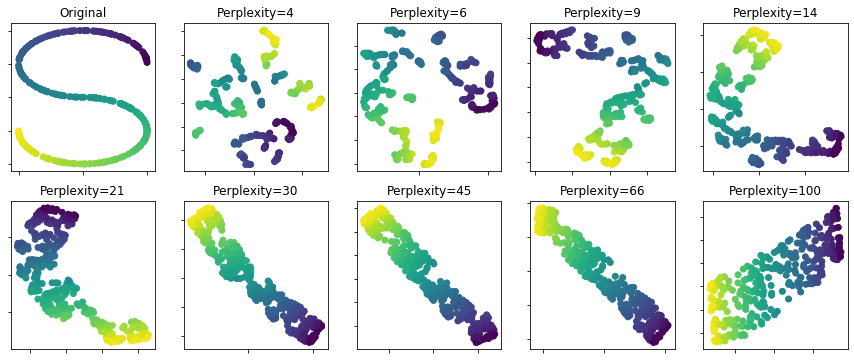

In [27]:
(fig, subplots) = plt.subplots(2, 5, figsize=(15, 6))
# 繪製資料原圖
ax = subplots[0][0]
ax.set_title("Original")
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# 繪製不同 perplexity 下的 t-SNE 分群圖
for i, perplexity in enumerate(perplexities):
    if i<4:
        ax = subplots[0][i+1]
    else:
        ax = subplots[1][i-4]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()